## Challenge 2: Pandas Challenge

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
import datetime 
import pickle
import seaborn as sns

%matplotlib inline

In [91]:
#Import CSV files, movies.csv
def get_movie_data(file_url):
    data = pd.read_csv(file_url, skiprows = 0)
    return data

df_movies = get_movie_data('2013_movies.csv')

In [92]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 5.5+ KB


#### **Challenge 1**

Plot domestic total gross over time.

In [93]:
df_movies.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [94]:
#convert ReleaseDate into a datetime field
df_movies['ReleaseDate'] = pd.to_datetime(df_movies.ReleaseDate, format="%Y-%m-%d %H:%M:%S")

In [95]:
df_gross_over_time = pd.DataFrame(df_movies.groupby(['ReleaseDate'])["DomesticTotalGross"].sum())
df_gross_over_time.head()

,DomesticTotalGross
ReleaseDate,
2013-01-04,34341945
2013-01-11,86042586
2013-01-18,71628180
2013-01-25,55703475
2013-02-01,66380662


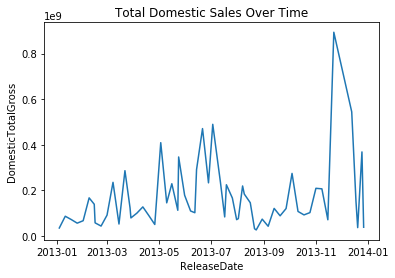

In [96]:
sns.lineplot(x=df_gross_over_time.index, y=df_gross_over_time['DomesticTotalGross'])
plt.title("Total Domestic Sales Over Time");

#### **Challenge 2**

Plot runtime vs. domestic total gross.


/Users/robfang29/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


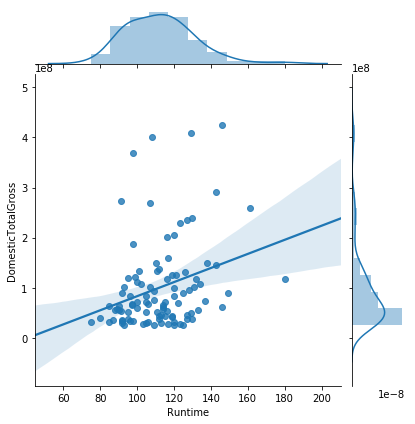

In [97]:
sns.jointplot("Runtime", "DomesticTotalGross", kind="regplot", data=df_movies);

#### **Challenge 3**

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.


In [98]:
df_movies.groupby(['Rating'], as_index=False)['Runtime','DomesticTotalGross'].mean()

,Rating,Runtime,DomesticTotalGross
0,G,107.000000,2.684928e+08
1,PG,99.933333,1.311357e+08
2,PG-13,117.510638,1.114498e+08
3,R,110.729730,6.989243e+07


#### **Challenge 4**

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

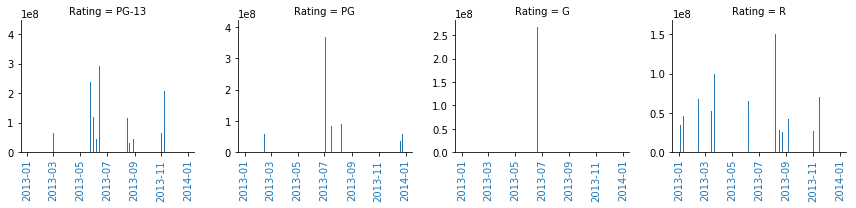

In [99]:
g = sns.FacetGrid(df_movies, col='Rating', sharex=True, sharey=False)
g.map(plt.bar,"ReleaseDate","DomesticTotalGross",align='center')
g.map(plt.xticks,rotation=90)

#### **Challenge 5**

What director in your dataset has the highest gross per movie?

In [100]:
max_director = df_movies.groupby(['Director'], as_index=False)['DomesticTotalGross'].mean()
print(max_director[max_director['DomesticTotalGross']==max_director['DomesticTotalGross'].max()])

            Director  DomesticTotalGross
27  Francis Lawrence           424668047


In [101]:
max_director.sort_values(by=['DomesticTotalGross'], ascending=False).head()

,Director,DomesticTotalGross
27,Francis Lawrence,424668047
81,Shane Black,409013994
15,Chris BuckJennifer Lee,400738009
71,Pierre CoffinChris Renaud,368061265
92,Zack Snyder,291045518


#### **Challenge 6**

Bin your dataset into months and make a bar graph of the mean domestic total gross by month.  Error bars will represent the standard error of the mean.

Title of graph should include:  Mean Domestic Total Gross by Month in 2013

Topic for consideration:  what is the correct formula for the standard error of the mean?  Examine the error bars and see if they are "reasonable."

In [113]:
df_movies['Month'] =  df_movies["ReleaseDate"].dt.strftime('%b')
df_mean_by_month = df_movies.groupby(['Month'],as_index=False)['DomesticTotalGross'].mean()

In [122]:
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug', 'Sep','Oct','Nov','Dec']
msorterIndex = dict(zip(month,range(len(month))))
msorterIndex

{'Jan': 0,
 'Feb': 1,
 'Mar': 2,
 'Apr': 3,
 'May': 4,
 'Jun': 5,
 'Jul': 6,
 'Aug': 7,
 'Sep': 8,
 'Oct': 9,
 'Nov': 10,
 'Dec': 11}

In [123]:
df_mean_by_month['Month_id'] = df_mean_by_month['Month']
df_mean_by_month['Month_id'] = df_mean_by_month['Month_id'].map(msorterIndex)
df_mean_by_month.sort_values('Month_id', inplace=True)
df_mean_by_month.head(12)

,Month,DomesticTotalGross,Month_id
4,Jan,4.954324e+07,0
3,Feb,6.738601e+07,1
7,Mar,9.609710e+07,2
0,Apr,6.094072e+07,3
8,May,1.774097e+08,4
6,Jun,1.506500e+08,5
5,Jul,1.057807e+08,6
1,Aug,6.853126e+07,7
11,Sep,6.171231e+07,8
10,Oct,1.150270e+08,9


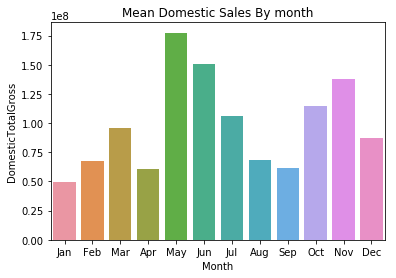

In [124]:
sns.barplot(x = 'Month',y='DomesticTotalGross',data=df_mean_by_month)
plt.title("Mean Domestic Sales By month");

#### Standard error of the mean is  the standard deviation of the sampling distribution of the mean = std dev/sqrt(num of observations)
The std error is very skewed for high grossing movies for our dataset.

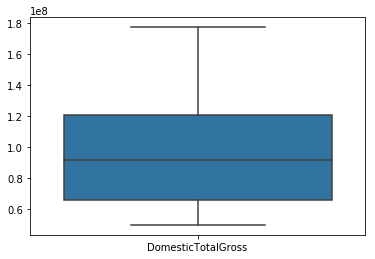

In [117]:
sns.boxplot(data=df_mean_by_month)

/Users/robfang29/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


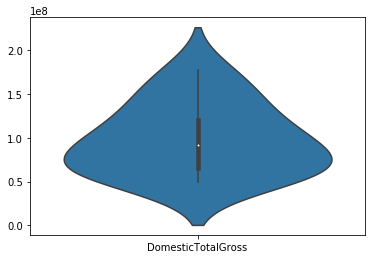

In [121]:
sns.violinplot(data=df_mean_by_month)